In [21]:
import numpy as np, matplotlib.pyplot as plt

In [22]:
%matplotlib inline

In [23]:
import scipy.integrate as integrate

In [24]:
def F(Z):
    return integrate.quad(lambda z:1.0/np.sqrt(z**3+1),0,Z)[0]

In [25]:
OmegaL=0.683;
OmegaM=1.0-0.683;
h=0.7 # reduced Hubble constant
A=(OmegaL/OmegaM)**0.3333
DH=3001.0/h # Mpc

In [26]:
def DM(Z):
    return A*DH/np.sqrt(OmegaL)*(F((Z+1)/A)-F(1.0/A))
def Dl(z): #luminous distance
    return (1+z)*DM(z)

In [20]:
# def DA(Z):
#     return DM(Z)/(Z+1)

In [27]:
def EZ(z):
    return np.sqrt(OmegaM*(1+z)**3+OmegaL)

In [28]:
zhigh=100.0
integrate.quad(lambda z:DM(z)**2/(1+z)/EZ(z),0,zhigh)[0]/DH**2

0.9313335996466094

In [29]:
def pp(z):
    return (A/np.sqrt(OmegaL)*(F((z+1)/A)-F(1.0/A)))**2/(EZ(z)*(1+z))

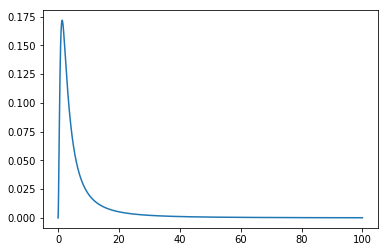

In [41]:
X=np.linspace(0,100,10000)
PP=[pp(x) for x in X]
plt.plot(X,PP)

The above $z$ distribution suggest that the most likely event are from $z\sim2$.

In [34]:
upper=max(PP)

In [51]:
#from scipy import *

In [31]:
N=10000

In [35]:
zwhole=np.random.uniform(0,zhigh,N)
ywhole=np.random.uniform(0,upper,N)
pwhole=np.interp(zwhole,X,PP)
mask=(ywhole<pwhole)

In [37]:
index=np.where(mask==True)[0]

In [40]:
len(index)

543

In [38]:
Nnew=round(N/(len(index))*N)

In [39]:
print(Nnew)

184162


In [42]:
zwhole=np.random.uniform(0,zhigh,Nnew)
ywhole=np.random.uniform(0,upper,Nnew)
pwhole=np.interp(zwhole,X,PP)
mask=(ywhole<pwhole)
index=np.where(mask==True)[0]
len(index)
zsampled=zwhole[index]

(array([0.12155998, 0.03956443, 0.01509102, 0.00752818, 0.00434956,
        0.00288155, 0.00215374, 0.00148534, 0.00108925, 0.00087882,
        0.00076   , 0.00057681, 0.00041589, 0.00034658, 0.00029954,
        0.00028221, 0.00028717, 0.00021042, 0.00015101, 0.00017081]),
 array([2.10058107e-02, 5.01894876e+00, 1.00168917e+01, 1.50148346e+01,
        2.00127776e+01, 2.50107205e+01, 3.00086635e+01, 3.50066064e+01,
        4.00045494e+01, 4.50024923e+01, 5.00004353e+01, 5.49983782e+01,
        5.99963211e+01, 6.49942641e+01, 6.99922070e+01, 7.49901500e+01,
        7.99880929e+01, 8.49860359e+01, 8.99839788e+01, 9.49819218e+01,
        9.99798647e+01]),
 <a list of 20 Patch objects>)

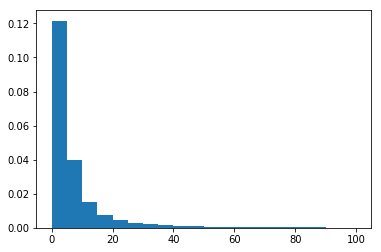

In [109]:
# plt.hist(zsampled,bins=20,density=True)

The sampling in $z$ is done

In [43]:
NM=len(index) # it is the number of sampled points
Msampled=np.random.normal(loc=1.5,scale=0.5,size=NM) # gaussian distribution with mean mass 1.5 solar mass, varsqrt=0.5 solar mass
cthsampled=np.random.uniform(0,1,size=NM)
phisampled=np.random.uniform(0,6.283,size=NM)
cosisampled=np.random.uniform(0,1,size=NM)
psisampled=np.random.uniform(0,3.14159,size=NM)

In [111]:
#thetasampled=np.arccos(cthsampled)
#isampled=np.arccos(cosisampled)

In [48]:
M0=1.31 #solar mass
D0=1e3 #Kpc
rho0=5.5e7
rhocri=1e5
def F1(cth,phi,psi):
    plus=-0.433*((1.0+cth**2)*np.sin(2.0*phi)*np.cos(2.0*psi)+2.0*cth*np.cos(2.0*phi)*np.sin(2.0*psi))
    cross=0.433*((1.0+cth**2)*np.sin(2.0*phi)*np.sin(2.0*psi)-2.0*cth*np.cos(2.0*phi)*np.cos(2.0*psi))
    return [plus,cross]
def rho(M,D,cth,phi,ci,psi):
    result=M/M0*D0/D*np.sqrt((1+ci**2)**2*F1(cth,phi,psi)[0]**2+4.*ci**2*F1(cth,phi,psi)[1]**2)*rho0
    return result
def f(M,D,cth,phi,ci,psi):
    rhothis=rho(M,D,cth,phi,ci,psi)
    if rhothis>=rhocri:
        result=1.
    else:
        result=0.
    return result        

In [49]:
summ=0
for i in range(0,NM):
    D=Dl(zsampled[i])
    summ=summ+f(Msampled[i],D,cthsampled[i],phisampled[i],cosisampled[i],psisampled[i])
average=summ/NM
print(average)

0.9149237142568455


0.9988885520864909


1.732